___

<a href='http://www.pieriandata.com'> <img src='../Pierian_Data_Logo.png' /></a>
___
# Logistic Regression Project 

In this project we will be working with a fake advertising data set, indicating whether or not a particular internet user clicked on an Advertisement. We will try to create a model that will predict whether or not they will click on an ad based off the features of that user.

This data set contains the following features:

* 'Daily Time Spent on Site': consumer time on site in minutes
* 'Age': cutomer age in years
* 'Area Income': Avg. Income of geographical area of consumer
* 'Daily Internet Usage': Avg. minutes a day consumer is on the internet
* 'Ad Topic Line': Headline of the advertisement
* 'City': City of consumer
* 'Male': Whether or not consumer was male
* 'Country': Country of consumer
* 'Timestamp': Time at which consumer clicked on Ad or closed window
* 'Clicked on Ad': 0 or 1 indicated clicking on Ad

## Import Libraries

**Import a few libraries you think you'll need (Or just import them as you go along!)**

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

## Get the Data
**Read in the advertising.csv file and set it to a data frame called ad_data.**

In [2]:
advert_df = pd.read_csv('advertising.csv')

**Check the head of ad_data**

In [3]:
advert_df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


** Use info and describe() on ad_data**

In [8]:
advert_df['Timestamp'] = pd.to_datetime(advert_df['Timestamp'])
advert_df.info()
advert_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Daily Time Spent on Site  1000 non-null   float64       
 1   Age                       1000 non-null   int64         
 2   Area Income               1000 non-null   float64       
 3   Daily Internet Usage      1000 non-null   float64       
 4   Ad Topic Line             1000 non-null   object        
 5   City                      1000 non-null   object        
 6   Male                      1000 non-null   int64         
 7   Country                   1000 non-null   object        
 8   Timestamp                 1000 non-null   datetime64[ns]
 9   Clicked on Ad             1000 non-null   int64         
dtypes: datetime64[ns](1), float64(3), int64(3), object(3)
memory usage: 78.2+ KB


,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


In [9]:
advert_df.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Timestamp,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,2016-04-10 10:34:06.636000256,0.50000
min,32.600000,19.000000,13996.500000,104.780000,0.000000,2016-01-01 02:52:10,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,2016-02-18 02:55:42,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,2016-04-07 17:27:29.500000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,2016-05-31 03:18:14,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,2016-07-24 00:22:16,1.00000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,NaN,0.50025


## Exploratory Data Analysis

Let's use seaborn to explore the data!

Try recreating the plots shown below!

** Create a histogram of the Age**

<AxesSubplot: xlabel='Age', ylabel='Count'>

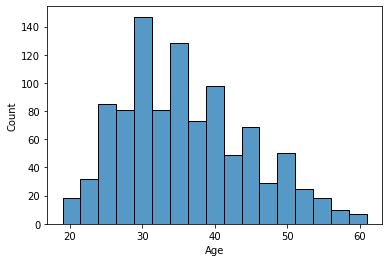

In [10]:
sns.histplot(data=advert_df, x = 'Age')

**Create a jointplot showing Area Income versus Age.**

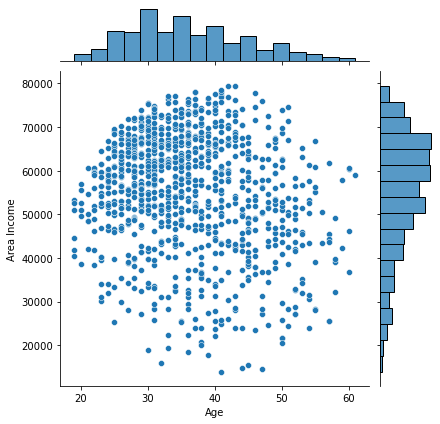

In [12]:
sns.jointplot(data = advert_df, x = 'Age', y = 'Area Income')

**Create a jointplot showing the kde distributions of Daily Time spent on site vs. Age.**

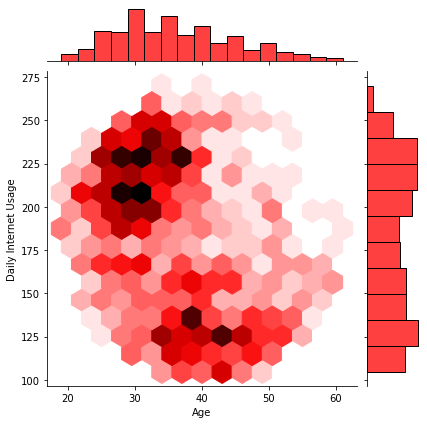

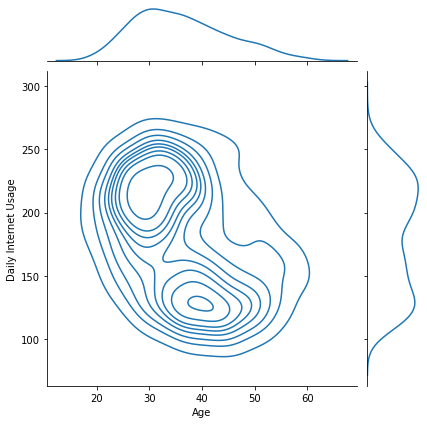

In [18]:
sns.jointplot(data = advert_df, x = 'Age', y = 'Daily Internet Usage', kind = "hex", color='red')
sns.jointplot(data = advert_df, x = 'Age', y = 'Daily Internet Usage', kind = "kde")

** Create a jointplot of 'Daily Time Spent on Site' vs. 'Daily Internet Usage'**

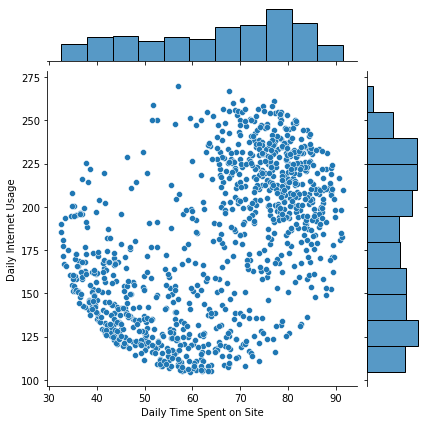

In [19]:
sns.jointplot(data = advert_df, x = 'Daily Time Spent on Site', y = 'Daily Internet Usage')

** Finally, create a pairplot with the hue defined by the 'Clicked on Ad' column feature.**

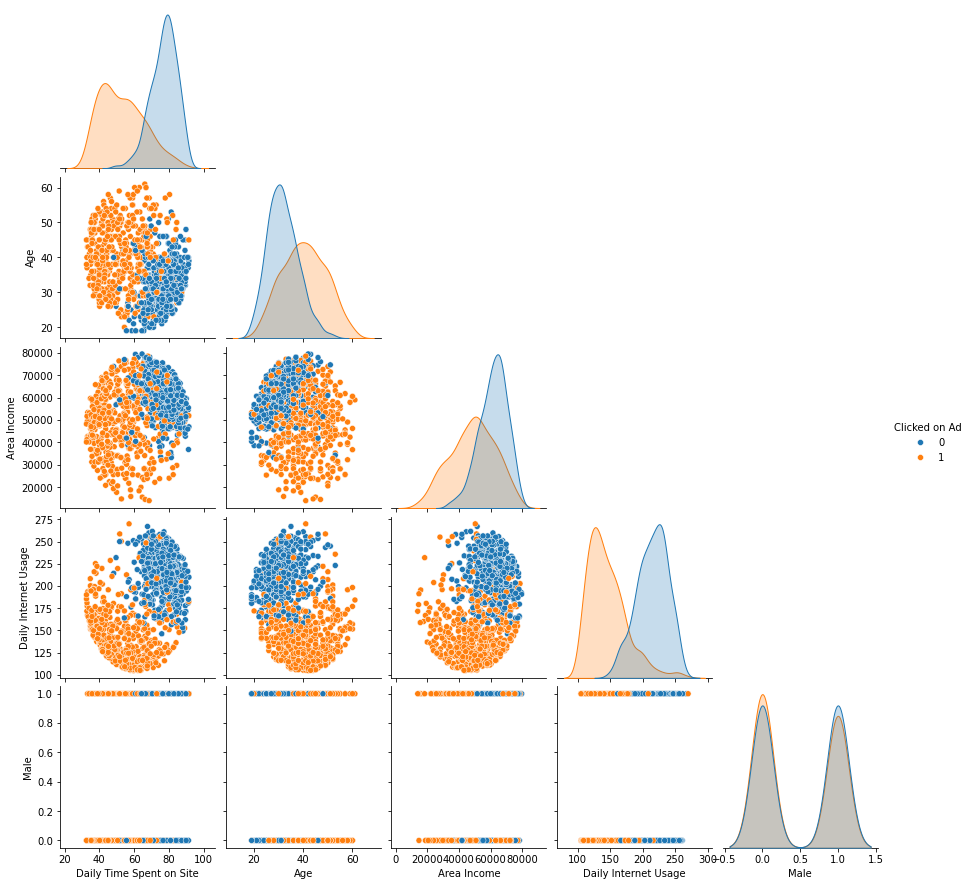

In [21]:
sns.pairplot(data = advert_df, hue='Clicked on Ad', corner = True)

# Logistic Regression

Now it's time to do a train test split, and train our model!

You'll have the freedom here to choose columns that you want to train on!

** Split the data into training set and testing set using train_test_split**

In [45]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(advert_df[['Daily Time Spent on Site', 'Age', 'Area Income', 'Daily Internet Usage', 'Male']], 
                                                    advert_df['Clicked on Ad'],
                                                    test_size=0.33, 
                                                    random_state=42)

** Train and fit a logistic regression model on the training set.**

In [46]:
from sklearn.linear_model import LogisticRegression
model1 = LogisticRegression()
model1.fit(X_train, y_train)
model1.coef_

array([[-5.41795559e-02,  2.60352410e-01, -1.71334807e-05,
        -2.67117555e-02,  2.31129234e-03]])

## Predictions and Evaluations
** Now predict values for the testing data.**

** Create a classification report for the model.**

In [59]:
y_predict = model1.predict(X=X_test)

from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, y_predict))
print(confusion_matrix(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.86      0.96      0.91       162
           1       0.96      0.85      0.90       168

    accuracy                           0.91       330
   macro avg       0.91      0.91      0.91       330
weighted avg       0.91      0.91      0.91       330

[[156   6]
 [ 25 143]]


## Great Job!